# Descriptive Statistics

In this notebook the initial exploration of the cities dataset is found. 

## Package import

All needed packages are imported at the top

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium

## Data loading

The preprocessed data is loaded where the first column is used for index. The first five rows of the dataframe is printed in order to get a better overview of how the data is structured.

In [12]:
df = pd.read_csv(os.path.abspath('../data/Processed/Cities.csv'), index_col=0)

print(df.shape)
df.head()

(331, 81)


,City,cityID,clusterID,Typology,Country,Car_Modeshare_(%),Public_Transit_Modeshare_(%),Bicycle_Modeshare_(%),Walking_Modeshare_(%),Gasoline_Pump_Price_(USD/liter),...,BikeShare_Propensity_Factor,Development_Factor,Sustainability_Factor,Population_Factor,Congestion_Factor,Sprawl_Factor,Network_Density_Factor,Latitude,Longitude,Continent
284,Baltimore(MD),285,7,Auto Sprawl,United States,85.0,6.1,0.3,2.6,0.66,...,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187,39.290882,-76.610759,North America
9,Melbourne,10,8,Auto Innovative,Australia,80.0,14.0,2.0,4.0,1.11,...,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910,-37.814218,144.963161,Oceania
185,Niamey,186,1,Congested Emerging,Niger,NaN,9.0,2.0,60.0,1.02,...,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312,13.524834,2.109823,Africa
327,Hanoi,328,12,MetroBike Emerging,Vietnam,8.0,10.0,2.0,NaN,0.90,...,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113,21.029450,105.854444,Asia
66,Urumqi,67,12,MetroBike Emerging,China,21.7,54.7,NaN,NaN,1.16,...,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617,43.419754,87.319461,Asia


The full list of columns are also shwon below:

In [13]:
print(f"There are {len(df.columns)} in the dataset, and they are:")
df.columns

There are 81 in the dataset, and they are:


Index(['City', 'cityID', 'clusterID', 'Typology', 'Country',
       'Car_Modeshare_(%)', 'Public_Transit_Modeshare_(%)',
       'Bicycle_Modeshare_(%)', 'Walking_Modeshare_(%)',
       'Gasoline_Pump_Price_(USD/liter)', 'Road_Deaths_Rate_(per_1000)',
       'Subway_Length_(km)', 'Subway_Length_Density_(per_km)',
       'Subway_Stations_per_Hundred_Thousand', 'Subway_Ridership_per_Capita',
       'Subway_Age_(years)', 'BRT_Length_(km)',
       'BRT_System_Length_Density_(per_km)',
       'BRT_Stations_per_Hundred_Thousand_Persons',
       'BRT_Fleet_per_Hundred_Thousand_Persons',
       'BRT_Annual_Ridership_per_Capita', 'BRT_Age_(years)',
       'Bikeshare_Stations', 'Bikeshare_Stations_per_Hundred_Thousand_Persons',
       'Bikeshare_Number_of_Bikes',
       'Bikeshare_Bicycles_per_Hundred_Thousand_Persons',
       'Bikeshare_Age_(years)', 'Congestion_(%)', 'Congestion_AM_Peak_(%)',
       'Congestion_PM_Peak_(%)', 'Traffic_Index', 'Travel_Time_Index',
       'Inefficiency_Index', 'Po

It can be seen that there are a wide range of columns to describe the city. If they all turn out to be relevant for the prediction time will tell. Moreover the data types are also shortly investigated to get an overview of what type data we a re working with:

In [14]:
df.dtypes.value_counts()

float64    67
int64      10
object      4
dtype: int64

It is seen that it is primarily numeric data that is available. Only four object columns are apparent which is shwon below:

In [15]:
df.dtypes[df.dtypes == "object"]

City         object
Typology     object
Country      object
Continent    object
dtype: object

Since the Typology only is a title for the cluster_ID it is in reality onlt the location that is specified by strings. The columns with integer type is also investigated to get an overview if there are any categorical variables. They are printed below:

In [16]:
df.dtypes[df.dtypes == "int64"]

cityID                             int64
clusterID                          int64
Subway_Age_(years)                 int64
Population                         int64
Land_Area_(sq._km)                 int64
Population_Density_(per_sq._km)    int64
Population_Change_1990_–_2000      int64
Population_Change_2000_–_2010      int64
Population_Change_2010_–_2020      int64
Population_Change_2020_–_2025      int64
dtype: object

Looking at the columns it is clear that the only categorical variable used are the cityID and clusterID. Both of these will not be used for the actual predictions since the cityID is just an arbitary nunmber and the clusterID is based on the other columns as seen in the article "A novel global urban typology framework for sustainable mobility futures".

## Missing values

Missing values are very important to be aware of when it comes to data science. Based on the number of missing values some columns or rows can (or should) fully be removed. In other cases the missing values can be imputed. They can also be left untouched but it is important to remember then as not all algorithmns handle missing values. Missing values can also be considered as its own category is some cases. Before taking any decision the *distribution* of missing values is investigated:

In [17]:
print(f"{len(df.loc[:,df.isna().sum()>0].isna().sum())}/{df.shape[1]} columns has at least one missing value. The number of missing values per column (that has missing value(s)) is:")
df.loc[:,df.isna().sum()>0].isna().sum()

48/81 columns has at least one missing value. The number of missing values per column (that has missing value(s)) is:


Car_Modeshare_(%)                                  107
Public_Transit_Modeshare_(%)                       104
Bicycle_Modeshare_(%)                              147
Walking_Modeshare_(%)                              132
Road_Deaths_Rate_(per_1000)                          1
BRT_Length_(km)                                      1
BRT_System_Length_Density_(per_km)                   2
BRT_Stations_per_Hundred_Thousand_Persons           10
BRT_Fleet_per_Hundred_Thousand_Persons              31
BRT_Annual_Ridership_per_Capita                      1
BRT_Age_(years)                                     15
Bikeshare_Stations                                   4
Bikeshare_Stations_per_Hundred_Thousand_Persons      1
Bikeshare_Number_of_Bikes                           18
Bikeshare_Bicycles_per_Hundred_Thousand_Persons     15
Bikeshare_Age_(years)                                3
Congestion_(%)                                     166
Congestion_AM_Peak_(%)                             166
Congestion

Firstly it is noticed that there is no missing values in the column with `CO2 Emissions per Capita (metric tonnes)` which is the value that is going to be predicted. This means that there should be no problem in regards error calculation of predictions.

The number of missing values looks structured to some degree This is posibibly due to the fact that the dataset is built from many sources as seen in table 1 in "A novel global urban typology framework for sustainable mobility futures". There is e.g. many columns that has 108 or 14 missing values. To investigate this structure further a binary plot based on na values is generated, which is shown below:

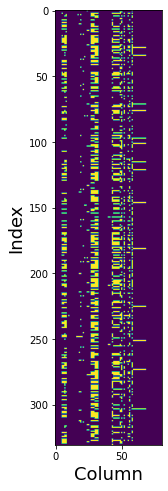

In [18]:
plt.figure(figsize = (20,8))
plt.imshow(df.isna())
plt.xlabel('Column', fontsize = 18)
plt.ylabel('Index', fontsize = 18)
plt.show()

From this it is clearly seen that there is structure to the missing values - as an example it is clear that it is the same 14 cities that has some missing values. This is definitely something to be aware of as these columns can not be used for prediction for these cities. After investigating the geographics of the cities a method to imput missing values will be used.

### Geographical placement

Let's get an overview of the location of the cities in the data set. Using the module `folium` a world map can be generated and all the cities can be added using the latitude and longitude that was added in the preprocessing. Notice that the name of a given city can be obtained by hovering the mouse over it. The cluster ID is used to color the cities.

In [19]:
coldict = {1:'#e6194B', 2:'#3cb44b', 3:'#ffe119', 4:'#4363d8', 5:'#f58231', 6:'#42d4f4', 7:'#f032e6', 8:'#fabed4', 9:'#469990', 10:'#dcbeff', 11:'#9A6324', 12:'#fffac8'}

def plot_points(map, latitude, longitude, col = 4, tooltip = None):
    for lat, lon, tt, c in zip(latitude, longitude, tooltip, col):
        folium.CircleMarker(location=[lat, lon],
                                tooltip = tt,
                                radius=1,
                                weight=4,
                                color = c).add_to(map)

m = folium.Map(prefer_canvas=True)
plot_points(m, df['Latitude'], df['Longitude'], [coldict[c] for c in df.clusterID], df['City'])
m

The cities seems to be spread fairly wide around the world with a lack of cities in the more Northern of Southern part of the world. The *densest* clusters of cities in the dataset are found in the Easter part of the US, Central Europa and Eastern part of Asia. Moreover it can also be seen that there are some geographical patterns to the city types. The distribution of types is neither close to uniform. Below this is confirmed with actual figures per type:

In [20]:
df.Typology.value_counts()

Congested Emerging         59
Auto Sprawl                51
BusTransit Sprawl          47
MassTransit Moderate       30
MetroBike Emerging         27
Hybrid Giant               26
Hybrid Moderate            20
MassTransit Heavyweight    19
Congested Boomer           17
BusTransit Dense           16
Auto Innovative            14
MetroBike Giant             5
Name: Typology, dtype: int64

## Imputing missing values

As discussed previously there are a lot of missing values. A strategy to imput these based on the city type has been created. The assumption is that cities in the same cluster are more similar compared to cities in different clusters. Therefore the missing values are imputed based on a KNN from cities in the same cluster, where the distance is defined as "as-the-crow-flies" distance between two points. The is calculated with the haversine formula as the earth is a globe. The function `KNN_imputer` is implemented below where it also has a argument if the KNN should be weighted or not.

In [21]:
def KNN_imputer(df, k, Weighted = False):
    # Haversine 
    def haversine(point1, point2):
        # convert decimal degrees to radians
        lon1, lat1 = map(np.radians, point1)
        lon2, lat2 = map(np.radians, point2)

        # Deltas
        delta_lon = lon2 - lon1 
        delta_lat = lat2 - lat1 
        
        # haversine formula 
        a = np.sin(delta_lat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(delta_lon/2)**2
        c = 2 * np.arcsin(np.sqrt(a)) 
        r = 6371 # Radius of earth in km
        return c * r
    
    # Copy of df to return
    df_new = df.copy()

    for City in df.City:
        # Cluster of city
        sub_df = df[df.clusterID == df[df.City == City].clusterID.values[0]].set_index('City')

        # Add distance based on the haversine formula
        sub_df['Dist'] = [haversine(
                                sub_df.loc[City, ["Latitude", "Longitude"]].values, 
                                sub_df.loc[c, ["Latitude", "Longitude"]].values)
                                for c in sub_df.index]

        # Get columns where data is missing
        missing = df[df.City == City].isna().squeeze()[df[df.City == City].isna().squeeze()].index

        for col in missing:
            if (~sub_df[col].isna()).sum() < k:
                continue
            
            knn = sub_df[[col, 'Dist']].dropna().nsmallest(k, 'Dist')

            if Weighted:
                # Change dist to weights 
                knn['Dist'] = (1/knn['Dist'])/((1/knn['Dist']).sum())
                imputed = (knn[col]*knn['Dist']).sum()
            else:
                imputed = knn[col].mean()

            df_new.loc[df_new['City'] == City, col] = imputed

    return df_new

Now a new data frame is created with imputed values and the missing values is investigated as before.

In [22]:
df_new = KNN_imputer(df, k = 5, Weighted=True)

print(f"{len(df_new.loc[:,df_new.isna().sum()>0].isna().sum())}/{df_new.shape[1]} columns now has at least one missing value. The number of missing values per column (that has missing value(s)) is:")
df_new.loc[:,df_new.isna().sum()>0].isna().sum()

16/81 columns now has at least one missing value. The number of missing values per column (that has missing value(s)) is:


Bicycle_Modeshare_(%)            1
Congestion_(%)                  75
Congestion_AM_Peak_(%)          75
Congestion_PM_Peak_(%)          75
Traffic_Index                   84
Travel_Time_Index               84
Inefficiency_Index              84
Unemployment_Rate_(%)           72
Cost_of_Living_Index            24
Rent_Index                      24
Grocery_Index                   24
Restaurant_Price_Index          24
Local_Purchasing_Power_Index    24
Poverty_Rate_(%)                26
Safety_Index                    26
Pollution_Index_                 1
dtype: int64

It can be seen that many columns now are free of missing values - this is though not the case for all and the reason for that is that for some *clusters* there are not enough cities that have data and as such the values can not be imputed.

## Correlation Analysis

The foundation for considering prediction is the fact the there are some correlation between the variables. Therefore it makes sense to consider the correlations. Firstly all the correlations are plotted as a heatmap to get an idea of the structure. This is done below where the respons variable (CO2 emmision) is shown in bold.

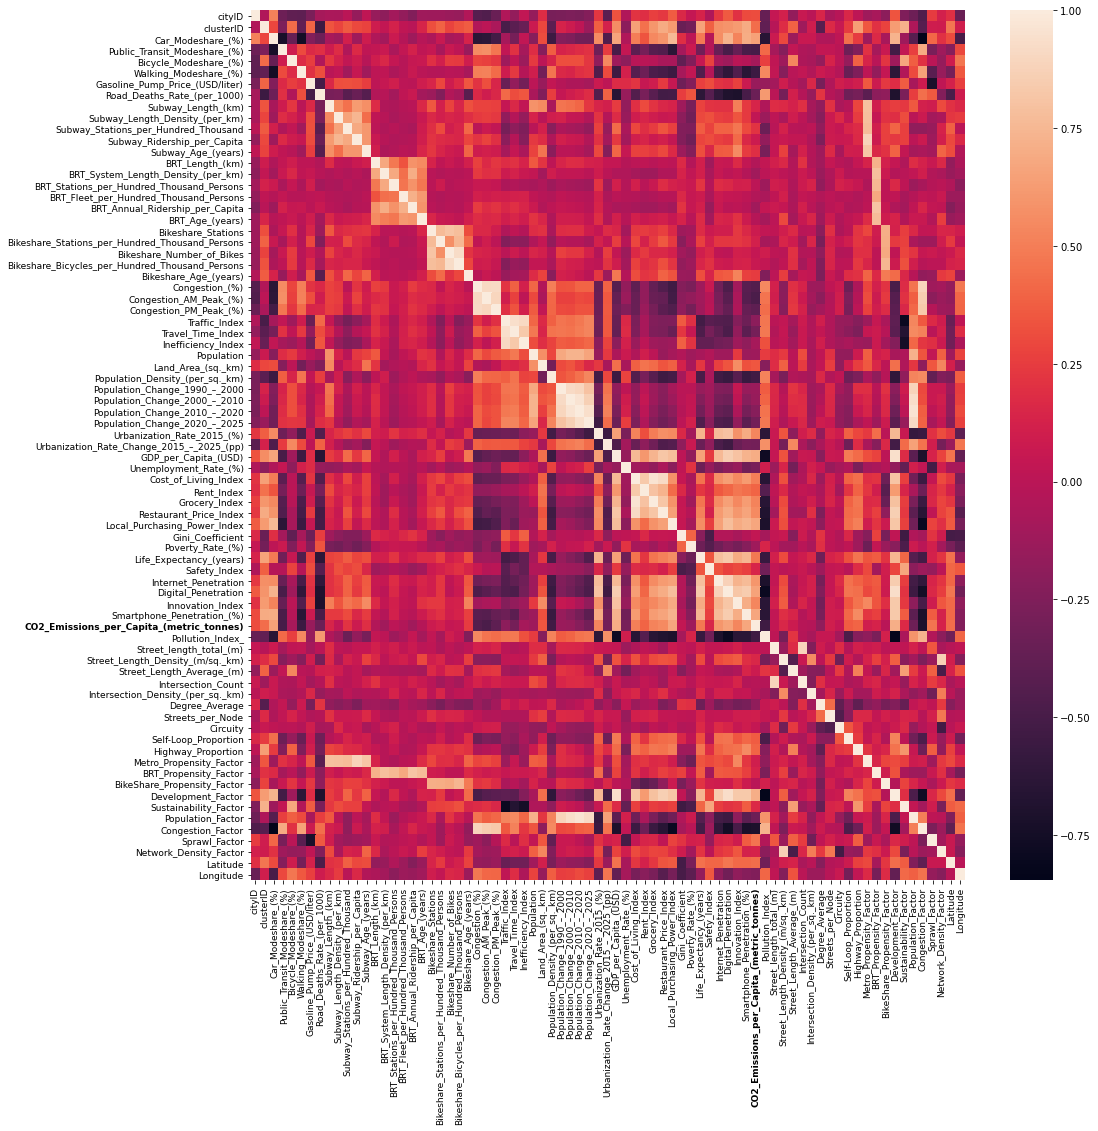

In [64]:
plt.figure(figsize = (16,16))
sns.heatmap(df_new.corr(),xticklabels=True, yticklabels=True)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)

# Get bold for CO2 emmision
f = ['regular']*len(df_new.columns)
f[list(df.columns).index('CO2_Emissions_per_Capita_(metric_tonnes)') - 3] = 'bold' #-3 since categorical values are not included

# Set bold for CO2 emmision
for ticklabelx, ticklabely, fontweight in zip(plt.gca().get_xticklabels(), plt.gca().get_yticklabels(), f):
    ticklabelx.set_fontweight(fontweight)
    ticklabely.set_fontweight(fontweight)

plt.show()

Naturally the plot is very messy with more than 3000 data points. It does though tell a story of a lot of correlations in the data which is something to be aware of when it comes to making a prediction mode. A concrete example is the three variables connected to congestion - they all have very high correlation with eachother why they are not able to show a lot of new stuff 

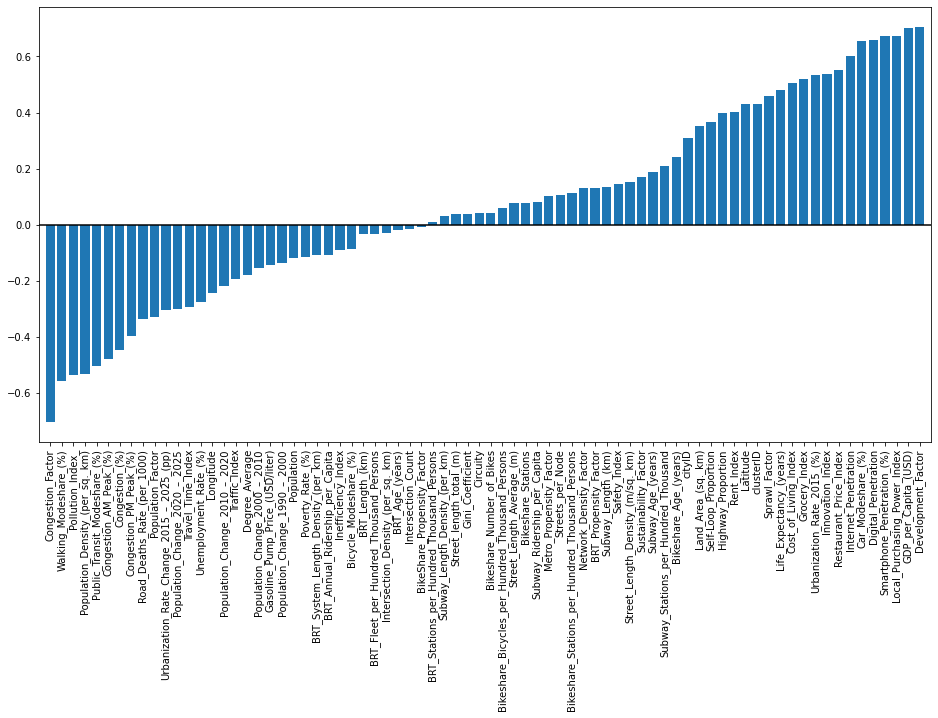

In [93]:
corr_list = df_new.corr().loc['CO2_Emissions_per_Capita_(metric_tonnes)'][df_new.corr().loc['CO2_Emissions_per_Capita_(metric_tonnes)'] <1]

# Make barplot
plt.figure(figsize = (16,8))
plt.bar(corr_list.sort_values().index, corr_list.sort_values().values)
plt.axhline(y=0, color = "k")
plt.xticks(rotation = 90)
plt.xlim([-1,len(corr_list)])
plt.show()

In [75]:
df.columns

Index(['City', 'cityID', 'clusterID', 'Typology', 'Country',
       'Car_Modeshare_(%)', 'Public_Transit_Modeshare_(%)',
       'Bicycle_Modeshare_(%)', 'Walking_Modeshare_(%)',
       'Gasoline_Pump_Price_(USD/liter)', 'Road_Deaths_Rate_(per_1000)',
       'Subway_Length_(km)', 'Subway_Length_Density_(per_km)',
       'Subway_Stations_per_Hundred_Thousand', 'Subway_Ridership_per_Capita',
       'Subway_Age_(years)', 'BRT_Length_(km)',
       'BRT_System_Length_Density_(per_km)',
       'BRT_Stations_per_Hundred_Thousand_Persons',
       'BRT_Fleet_per_Hundred_Thousand_Persons',
       'BRT_Annual_Ridership_per_Capita', 'BRT_Age_(years)',
       'Bikeshare_Stations', 'Bikeshare_Stations_per_Hundred_Thousand_Persons',
       'Bikeshare_Number_of_Bikes',
       'Bikeshare_Bicycles_per_Hundred_Thousand_Persons',
       'Bikeshare_Age_(years)', 'Congestion_(%)', 'Congestion_AM_Peak_(%)',
       'Congestion_PM_Peak_(%)', 'Traffic_Index', 'Travel_Time_Index',
       'Inefficiency_Index', 'Po

In [ ]:
# PCA to check correlation